In [1]:
!pip install tensorflow
!pip install pillow
!pip install scipy

In [2]:
import tensorflow as tf
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from image_utils import split_and_organize_images, create_data_set_from_images
from cnn_builder import CNNBuilder

In [3]:
directories = dict(
    src="../data",
    output=r"c:\temp\imagenet224",
    pickle=r"./"
)

src_image_path = Path(os.path.join(os.getcwd(), directories["src"]))
output_path = Path(directories["output"])
split_and_organize_images(src_image_path, output_path, max_workers=8)

In [4]:
training_set = create_data_set_from_images(os.path.join(directories["output"], "train"))
test_set = create_data_set_from_images(os.path.join(directories["output"], "test"))

Found 13391 images belonging to 10 classes.
Found 5262 images belonging to 10 classes.


In [5]:
builder = CNNBuilder()
builder.add_input(kernel_size=7)
builder.add_max_pool()
builder.add_convolution(filters=192, kernel_size=3, strides=(1, 1))
builder.add_max_pool()
builder.add_dropout(0.4)
builder.add_flatten()
builder.add_full_connection()
builder.add_output_layer(10, activation="softmax")

model = builder.build()
print(model.summary())

C:\src\my\uwf-idc6146-deep-learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 109, 109, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 55, 55, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,389,258 (73.96 MB)

 Trainable params: 19,389,258 (73.96 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
training_result = model.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25


C:\src\my\uwf-idc6146-deep-learning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


419/419 ━━━━━━━━━━━━━━━━━━━━ 309s 730ms/step - accuracy: 0.2581 - loss: 0.3132 - precision: 0.4076 - recall: 0.0523 - val_accuracy: 0.3926 - val_loss: 0.2516 - val_precision: 0.5245 - val_recall: 0.2174
Epoch 2/25
419/419 ━━━━━━━━━━━━━━━━━━━━ 304s 721ms/step - accuracy: 0.4322 - loss: 0.2438 - precision: 0.5984 - recall: 0.2415 - val_accuracy: 0.5019 - val_loss: 0.2174 - val_precision: 0.6565 - val_recall: 0.3476
Epoch 3/25
419/419 ━━━━━━━━━━━━━━━━━━━━ 300s 713ms/step - accuracy: 0.4937 - loss: 0.2211 - precision: 0.6334 - recall: 0.3503 - val_accuracy: 0.5384 - val_loss: 0.2069 - val_precision: 0.6816 - val_recall: 0.3962
Epoch 4/25
419/419 ━━━━━━━━━━━━━━━━━━━━ 289s 687ms/step - accuracy: 0.5264 - loss: 0.2133 - precision: 0.6496 - recall: 0.3855 - val_accuracy: 0.5439 - val_loss: 0.2063 - val_precision: 0.6846 - val_recall: 0.4042
Epoch 5/25
419/419 ━━━━━━━━━━━━━━━━━━━━ 293s 695ms/step - accuracy: 0.5508 - loss: 0.2011 - precision: 0.6698 - recall: 0.4285 - val_accuracy: 0.5728 - val

In [7]:
if not os.path.exists(directories["pickle"]):
    os.makedirs(directories["pickle"])
    
with open(os.path.join(directories["pickle"], "training_results_control.pkl"), "wb") as file:
    pickle.dump(training_result, file)

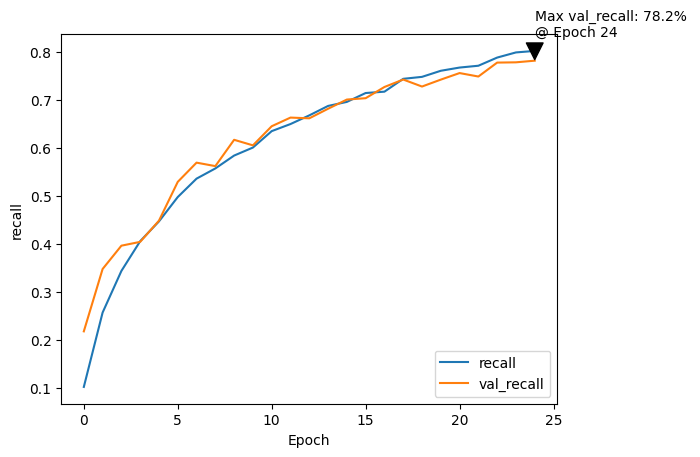

In [15]:
def plot_accuracy_curve(training_result, metric):
    val_metric = f"val_{metric}"
    train_perf = training_result.history[metric]
    validation_perf = training_result.history[val_metric]
    
    # intersection_idx = np.argwhere(
    #     np.isclose(train_perf, validation_perf, atol=1e-1)).flatten()[0]
    # 
    # intersection_value = train_perf[intersection_idx]
    
    plt.plot(train_perf, label=metric)
    plt.plot(validation_perf, label=val_metric)
    # plt.axvline(x=intersection_idx, color="r", linestyle="--", label="Intersection")
    
    max_val = max(validation_perf)
    max_val_epoch = validation_perf.index(max_val)
    
    plt.annotate(f"Max {val_metric}: {max_val*100:.1f}% \n@ Epoch {max_val_epoch}",
                 xy=(max_val_epoch, max_val),
                 xytext=(max_val_epoch, max_val + 0.05),
                 arrowprops=dict(facecolor="black", shrink=0.05))
    
    # plt.annotate(f"Optimal Value: {intersection_value:.1f}\n@ Epoch {intersection_idx}",
    #      	xy=(intersection_idx, intersection_value),
    #      	xycoords="data",
    #      	fontsize=10,
    #      	color='green')
    
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.legend(loc="lower right")
    
# plot_accuracy_curve(training_result, "accuracy")
# plot_accuracy_curve(training_result, "precision")
plot_accuracy_curve(training_result, "recall")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
validation_set = create_data_set_from_images(os.path.join(directories["output"], "val"))
validation_predictions = model.predict(validation_set)